<a href="https://colab.research.google.com/github/Lima-Ricardo/Macine_Learning_Pycaret/blob/main/regressao_precos_de_autom%C3%B3veis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
 !pip install pycaret

In [25]:
import numpy as np
from pycaret.datasets import get_data

**Base de Dados**

In [26]:
todas_bases = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,NaN,NaN,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,NaN,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,NaN,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,NaN,683,10,N
6,credit,Multivariate,Classification (Binary),default,NaN,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,NaN,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,NaN,10000,14,N
9,employee,Multivariate,Classification (Binary),left,NaN,14999,10,N


In [27]:
dataset =  get_data('automobile')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [28]:
type(dataset)

pandas.core.frame.DataFrame

In [29]:
dataset.shape

(202, 26)

In [30]:
base_treinamento = dataset.sample(frac=0.9, random_state=1)
base_treinamento.shape

(182, 26)

In [31]:
base_treinamento.index

Index([196,  95, 173, 123,  38,  94,  78,  58,  29,   4,
       ...
        22,  61,  63,   7, 198, 141,  86,  96,  68,  50],
      dtype='int64', length=182)

In [32]:
base_teste = dataset.drop(base_treinamento.index)
base_teste.shape

(20, 26)

In [33]:
base_teste.index

Index([ 20,  25,  37,  71,  72,  79, 101, 129, 133, 134, 137, 139, 140, 142,
       144, 146, 156, 157, 178, 192],
      dtype='int64')

**Configuração do ambiente Pycaret**

In [34]:
from pycaret.regression import setup
experimento = setup(base_treinamento, target='price', session_id=1)

,Description,Value
0,Session id,1
1,Target,price
2,Target type,Regression
3,Original data shape,"(182, 26)"
4,Transformed data shape,"(182, 89)"
5,Transformed train set shape,"(127, 89)"
6,Transformed test set shape,"(55, 89)"
7,Numeric features,11
8,Categorical features,14
9,Rows with missing values,19.2%


**Treinamento de vários modelos com validação cruzada**

In [35]:
from pycaret.regression import compare_models
modelos = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,2246.0830,8981652.1742,2906.6047,0.8349,0.2232,0.1851,0.2300
ridge,Ridge Regression,2377.1909,10677746.3233,3131.7724,0.8243,0.2449,0.2003,0.2250
llar,Lasso Least Angle Regression,2372.9051,11135322.3804,3172.5652,0.8210,0.2414,0.1998,0.2340
et,Extra Trees Regressor,2335.9172,14202221.2140,3324.1280,0.8033,0.2112,0.1659,0.4160
gbr,Gradient Boosting Regressor,2319.2400,15320092.2210,3399.8289,0.7900,0.2249,0.1723,0.3310
lr,Linear Regression,2450.0982,11211308.7115,3192.2701,0.7841,0.2756,0.2079,1.2430
rf,Random Forest Regressor,2478.7238,16278446.1348,3550.4348,0.7690,0.2393,0.1856,0.6880
ada,AdaBoost Regressor,2679.8270,16372970.1570,3678.6879,0.7586,0.2556,0.2140,0.3060
xgboost,Extreme Gradient Boosting,2512.6118,17462648.1508,3675.5496,0.7573,0.2446,0.1874,0.5700
lightgbm,Light Gradient Boosting Machine,2733.3761,17661793.5055,3934.4605,0.7227,0.2599,0.2001,0.5110


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

**Tuning dos modelos**

In [36]:
from pycaret.regression import create_model
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2350.4615,11474637.5385,3387.4234,0.5777,0.2862,0.2392
1,2920.0769,13155295.9231,3627.0230,0.7144,0.2317,0.2040
2,3143.0000,17396272.6923,4170.8839,0.6782,0.2898,0.2440
3,5327.3846,88496632.0000,9407.2649,0.3459,0.3910,0.2155
4,2373.4615,12664310.5385,3558.6951,0.8039,0.2340,0.1915
5,2813.0769,18067140.1538,4250.5459,0.8749,0.2312,0.1824
6,2078.0769,8640675.3077,2939.5026,0.8148,0.2219,0.1749
7,3326.7500,17757437.7500,4213.9575,0.7554,0.3247,0.2832
8,2123.3333,8495746.3333,2914.7464,0.7298,0.2653,0.1781


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [37]:
dt

DecisionTreeRegressor(random_state=1)

In [38]:
from pycaret.regression import tune_model
dt_tuning = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2398.7216,10364028.8675,3219.3212,0.6185,0.2332,0.2063
1,3816.9910,29676077.1953,5447.5754,0.3557,0.3083,0.2536
2,2738.6090,17072037.7634,4131.8323,0.6842,0.2722,0.2048
3,4996.5939,51443436.8378,7172.4080,0.6198,0.3009,0.2423
4,1988.6474,6672994.5845,2583.2140,0.8967,0.2074,0.1617
5,3359.3357,34673459.3491,5888.4174,0.7599,0.2170,0.1566
6,1636.9310,4999002.4521,2235.8449,0.8928,0.1526,0.1206
7,1716.5772,5345402.0592,2312.0126,0.9264,0.1560,0.1207
8,2056.4677,8648960.8395,2940.9116,0.7249,0.1907,0.1592


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [39]:
dt_tuning

DecisionTreeRegressor(criterion='friedman_mse', max_depth=13,
                      max_features='sqrt', min_impurity_decrease=0.0005,
                      min_samples_leaf=3, min_samples_split=7, random_state=1)

**Gráficos**

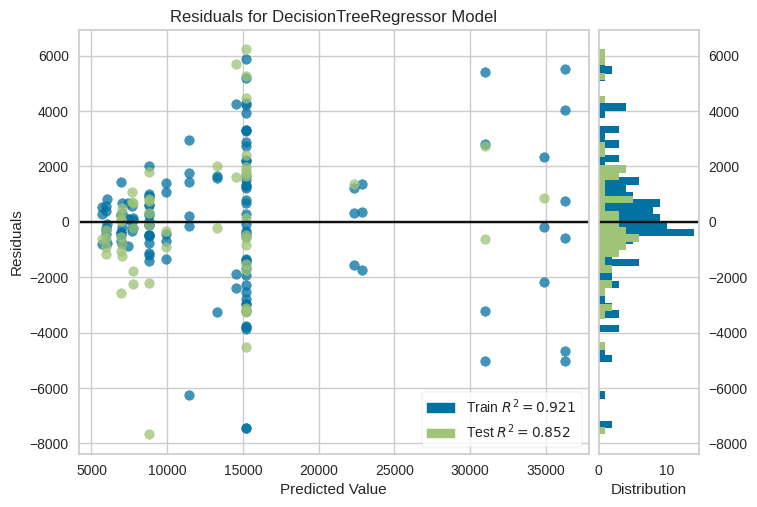

In [40]:
from pycaret.regression import plot_model
plot_model(dt_tuning)

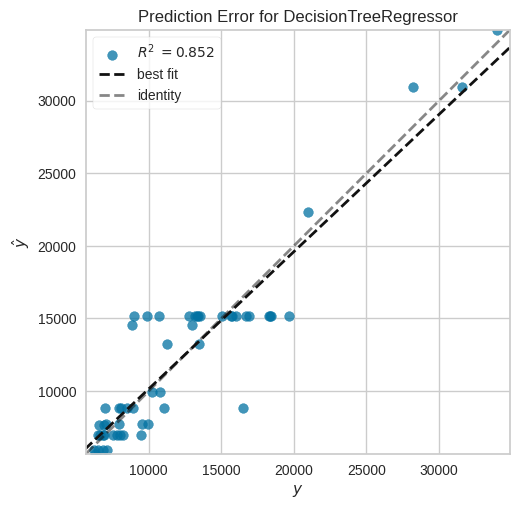

In [41]:
plot_model(dt_tuning, plot='error')

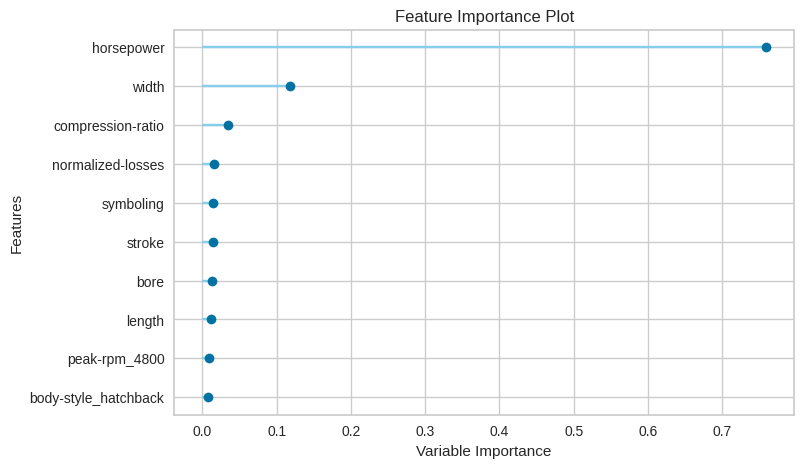

In [42]:
plot_model(dt_tuning, plot='feature')

In [44]:
from pycaret.regression import evaluate_model
evaluate_model(dt_tuning)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Previsões com o modelo**

In [45]:
from pycaret.regression import predict_model
predict_model(dt_tuning)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,1680.1794,5561123.1747,2358.2034,0.8523,0.1954,0.1474


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,prediction_label
89,1,122.0,nissan,gas,std,four,sedan,fwd,front,94.500000,...,2bbl,3.15,3.29,9.400000,69,5200,31,37,6849,6934.000000
191,-1,74.0,volvo,gas,std,four,wagon,rwd,front,104.300003,...,mpfi,3.78,3.15,9.500000,114,5400,23,28,13415,15169.650000
175,3,197.0,toyota,gas,std,two,hatchback,rwd,front,102.900002,...,mpfi,3.27,3.35,9.300000,161,5200,19,24,15998,15169.650000
183,2,94.0,volkswagen,diesel,turbo,four,sedan,fwd,front,97.300003,...,idi,3.01,3.4,23.000000,68,4500,37,42,9495,6934.000000
19,0,81.0,chevrolet,gas,std,four,sedan,fwd,front,94.500000,...,2bbl,3.03,3.11,9.600000,70,5400,38,43,6575,7664.000000
177,-1,NaN,toyota,gas,std,four,wagon,rwd,front,104.500000,...,mpfi,3.27,3.35,9.200000,156,5200,19,24,15750,15169.650000
127,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.099998,...,mpfi,3.46,3.9,8.700000,?,?,23,31,9895,15169.650000
124,3,NaN,porsche,gas,std,two,hardtop,rwd,rear,89.500000,...,mpfi,3.74,2.9,9.500000,207,5900,17,25,34028,34870.666667
152,0,91.0,toyota,gas,std,four,sedan,fwd,front,95.699997,...,2bbl,3.19,3.03,9.000000,70,4800,30,37,6938,7664.000000
130,3,150.0,saab,gas,std,two,hatchback,fwd,front,99.099998,...,mpfi,2.54,2.07,9.300000,110,5250,21,28,15040,15169.650000


In [46]:
from pycaret.regression import finalize_model
dt_final = finalize_model(dt_tuning)
print(dt_final)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['symboling', 'normalized-losses',
                                             'wheel-base', 'length', 'width',
                                             'height', 'curb-weight',
                                             'engine-size', 'compression-ratio',
                                             'city-mpg', 'highway-mpg'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['make', 'fuel-type', 'aspiration...
                                    transformer=TargetEncoder(cols=['bore',
                                                                    'stroke',
                                                                    'horsepower'],
                                                              handle_missing='return_nan'))),
                ('clean

In [47]:
from pycaret.regression import save_model
save_model(dt_final, 'dt')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['symboling', 'normalized-losses',
                                              'wheel-base', 'length', 'width',
                                              'height', 'curb-weight',
                                              'engine-size', 'compression-ratio',
                                              'city-mpg', 'highway-mpg'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['make', 'fuel-type', 'aspiration...
                                     transformer=TargetEncoder(cols=['bore',
                                                                     'stroke',
                                                                     'horsepower'],
                                                               handle_missing='return_nan'))),
         

In [48]:
from pycaret.regression import load_model
dt_carregado = load_model('/content/dt')

Transformation Pipeline and Model Successfully Loaded


In [49]:
previsoes = predict_model(dt_carregado, data=base_teste)
previsoes

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,1436.1804,3896308.4047,1973.9069,0.9482,0.1611,0.1364


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,prediction_label
20,1,118.0,dodge,gas,std,two,hatchback,fwd,front,93.699997,...,2bbl,2.97,3.23,9.41,68,5500,37,41,5572,6854.333333
25,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.699997,...,2bbl,2.97,3.23,9.40,68,5500,31,38,7609,7387.750000
37,0,106.0,honda,gas,std,two,hatchback,fwd,front,96.500000,...,1bbl,3.15,3.58,9.00,86,5800,27,33,9095,8336.111111
71,1,NaN,mercedes-benz,gas,std,two,hardtop,rwd,front,112.000000,...,mpfi,3.8,3.35,8.00,184,4500,14,16,45400,39718.333333
72,1,NaN,mercury,gas,turbo,two,hatchback,rwd,front,102.699997,...,mpfi,3.78,3.12,8.00,175,5000,19,24,16503,14314.666667
79,3,NaN,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.900002,...,spdi,3.58,3.86,7.00,145,5000,19,24,12629,13569.500000
101,3,194.0,nissan,gas,std,two,hatchback,rwd,front,91.300003,...,mpfi,3.43,3.27,9.00,160,5200,19,25,17199,17015.666667
129,2,104.0,saab,gas,std,four,sedan,fwd,front,99.099998,...,mpfi,3.54,3.07,9.30,110,5250,21,28,12170,14989.800000
133,2,104.0,saab,gas,turbo,four,sedan,fwd,front,99.099998,...,mpfi,3.54,3.07,9.00,160,5500,19,26,18620,14989.800000
134,2,83.0,subaru,gas,std,two,hatchback,fwd,front,93.699997,...,2bbl,3.62,2.36,9.00,69,4900,31,36,5118,7847.000000


In [53]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(previsoes['price'], previsoes['prediction_label'])

1436.180405982906